In [2]:
import pandas as pd

In [4]:
car=pd.read_csv('quikr_car.csv')

In [7]:
car
# Mistakes
car['year'].unique()
# Also year is in objects
car['Price'].unique()
# Price also has objects
car['kms_driven'].unique()
car['fuel_type'].unique()
# Nan value in the fuel type

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [9]:
car=car[car['year'].str.isnumeric()]
car['year']=car['year'].astype(int)

/tmp/ipykernel_12520/3630123352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year']=car['year'].astype(int)


In [10]:
# price column
car=car[car['Price']!='Ask For Price']

In [11]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [12]:
# kms_drive column
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [13]:
car=car[car['kms_driven'].str.isnumeric()]

In [14]:
car=car[~car['fuel_type'].isna()]

In [15]:
# Now we are going to change the name of the car.
# We will replace the name of the car with first three words
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [16]:
# Now reseting our data so that indexing get correct
car=car.reset_index(drop=True)

In [17]:
# so here we have observe tha one of the car has price is 85 laks
# where price of other cars is less than 85 lakhs,so we need to 
# remove it
car=car[car['Price']<6e6]

In [18]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [19]:
car.shape

(815, 6)

In [20]:
car.to_csv('cleaned_car_2.csv')

In [30]:
car=pd.read_csv('Cleaned_Car_data.csv',index_col=0)

In [31]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [32]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=100)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm=LinearRegression()

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [40]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])
print(ohe)

OneHotEncoder()


In [41]:
# Now we create a column to transform our categorical columns
column_transform=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                         remainder='passthrough')

In [42]:
newobj=make_pipeline(column_transform,lm)

In [43]:
newobj.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [44]:
# Predicting the output over here
y_pred=newobj.predict(X_test)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

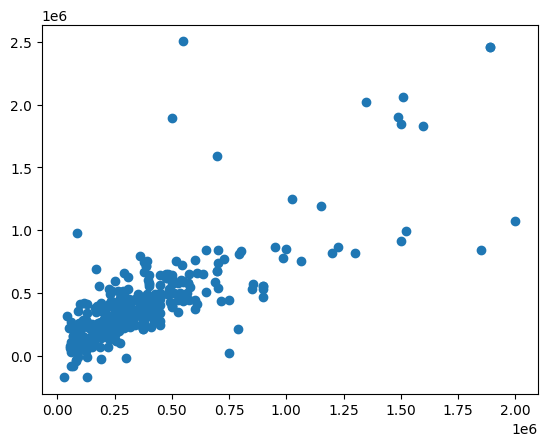

In [47]:
plt.scatter(y_test,y_pred)

In [48]:
r2_score(y_test,y_pred)

0.4474352391818256

In [52]:
# Now as our model r2 score value is not correct so we need to find the random state value for which r2 is close to one
import numpy as np
score=[]
for i in range(10000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lm=LinearRegression()
    newobj=make_pipeline(column_transform,lm)
    newobj.fit(X_train,y_train)
    y_pred=newobj.predict(X_test)
    score.append(r2_score(y_test,y_pred))
    
    

In [53]:
np.argmax(score)

9294

In [67]:
score[9294]

0.8934145261978917

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=9294)
lm=LinearRegression()
newobj=make_pipeline(column_transform,lm)
newobj.fit(X_train,y_train)
y_pred=newobj.predict(X_test)
r2_score(y_test,y_pred)

0.8934145261978917

In [70]:
y_pred=newobj.predict(X_test)

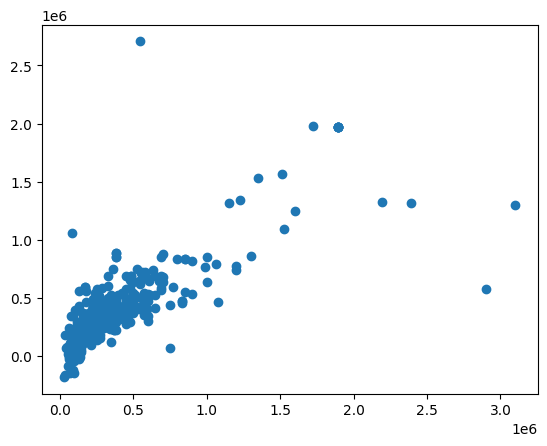

In [63]:
plt.scatter(y_test,y_pred)

In [71]:
newobj.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([436022.96704892])

In [72]:
import pickle
pickle.dump(newobj,open('LinearRegressionModel.pkl','wb'))

In [1]:
import pandas as pd
cars=pd.read_csv('Cleaned_Car_data.csv',sep=',')


In [2]:
# json_car=r"/home/vaibhav8101/Documents/car_price_prediction/car_react.json"
# cars.to_json(json_car,indent=1,orient='records')
cars.head()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel


In [3]:
cars.rename( columns={'Unnamed: 0':'id'}, inplace=True )

In [4]:
cars.head()

,id,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel


In [5]:
json_car=r"/home/vaibhav8101/Documents/car_price_prediction/car_react.json"
cars.to_json(json_car,indent=1,orient='records')